In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
run_dirs = [
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-0.1/run_2024-09-15_15-30-03",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-0.3/run_2024-09-15_15-51-42",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-0.5/run_2024-09-15_16-15-35",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-0.7/run_2024-09-15_16-41-47",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-1.0/run_2024-09-15_17-08-29",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-2.0/run_2024-09-15_17-25-53",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space1/temperature-3.0/run_2024-09-15_17-32-06",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-0.1/run_2024-09-15_17-37-01",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-0.3/run_2024-09-15_18-03-51",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-0.5/run_2024-09-15_18-27-18",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-0.7/run_2024-09-15_18-51-09",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-1.0/run_2024-09-15_19-12-55",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-2.0/run_2024-09-15_19-30-29",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space5/temperature-3.0/run_2024-09-15_19-38-10",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-0.1/run_2024-09-15_19-44-59",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-0.3/run_2024-09-15_20-07-54",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-0.5/run_2024-09-15_20-29-43",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-0.7/run_2024-09-15_20-50-20",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-1.0/run_2024-09-15_21-09-07",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-2.0/run_2024-09-15_21-25-46",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/chron_split/pretrained-True_space10/temperature-3.0/run_2024-09-15_21-37-09",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-0.1/run_2024-09-15_01-42-26",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-0.3/run_2024-09-15_01-52-09",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-0.5/run_2024-09-15_02-01-50",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-0.7/run_2024-09-15_02-11-33",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-1.0/run_2024-09-15_02-21-09",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-2.0/run_2024-09-15_02-27-31",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-3.0/run_2024-09-15_02-30-36",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-0.1/run_2024-09-15_02-31-35",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-0.3/run_2024-09-15_02-37-50",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-0.5/run_2024-09-15_02-44-30",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-0.7/run_2024-09-15_02-51-13",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-1.0/run_2024-09-15_02-57-31",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-2.0/run_2024-09-15_03-03-20",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-3.0/run_2024-09-15_03-04-35",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-0.1/run_2024-09-15_03-05-46",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-0.3/run_2024-09-15_03-14-39",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-0.5/run_2024-09-15_03-23-17",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-0.7/run_2024-09-15_03-32-30",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-1.0/run_2024-09-15_03-41-07",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-2.0/run_2024-09-15_03-44-48",
    "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-3.0/run_2024-09-15_03-51-31"
]

In [6]:
import os
import pandas as pd
import numpy as np
import re


# Initialize an empty list to store DataFrames
dfs = []

for run_directory in run_dirs:
    # Extract space dimension and temperature from the run_directory
    match = re.search(r'space(\d+)/temperature-([\d.]+)', run_directory)
    if match:
        space_dim = int(match.group(1))
        temperature = float(match.group(2))
    else:
        raise ValueError("Could not extract space dimension and temperature from the run_directory")
    
    # Extract the split from the run_directory
    split_match = re.search(r'inference_results/([^/]+)/', run_directory)
    if split_match:
        split = split_match.group(1)
    else:
        raise ValueError("Could not extract split from the run_directory")

    def safe_eval(x):
        try:
            result = eval(x) if 'nan' not in x.lower() and 'inf' not in x.lower() else [np.nan]
            return result
        except Exception as e:
            print(f"Error evaluating row: {x}, Error: {e}")
            return np.nan  # Return NaN for problematic rows
    
    # Load the CSV file into a DataFrame
    csv_file_path = os.path.join(run_directory, "computed_metrics.csv")
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        # Skip rows with all NaN values
        df = df[~df['Values'].apply(lambda x: 'nan' in x.lower() or 'inf' in x.lower())]
    else:
        print(f"File not found: {csv_file_path}. Skipping this run directory.")
        continue
    
    # Compute the mean and std for each row, handling NaN values


    # def nanmean_with_warning(x):
    #     result = safe_eval(x)
    #     if isinstance(result, (list, tuple)) and len(result) == 0:
    #         print(f"Empty slice encountered for row: {x}")
    #     return np.nanmean(result)
    
    df['Mean'] = df['Values'].apply(lambda x: np.mean(eval(x)))
    df['STD'] = df['Values'].apply(lambda x: np.std(eval(x)))
        
    # Add space dimension, temperature, and run directory to the DataFrame
    df['Space Dimension'] = space_dim
    df['Temperature'] = temperature
    df['Run Directory'] = run_directory
    # Add split as a column
    df['Split'] = split
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
big_df = pd.concat(dfs, ignore_index=True)

# Filter out the 'Overall' class label
filtered_df = big_df[big_df['Class Label'] != 'Overall']

# Combine values across all class labels for each metric
combined_metrics = filtered_df.groupby(['Space Dimension', 'Temperature', 'Metric', 'Run Directory'])['Values'].apply(
    lambda x: np.concatenate([safe_eval(i) for i in x if not pd.isna(i)]) if len(x) > 0 else np.array([])  # Handle empty case
)

# Compute the mean and std for each combined metric, skipping NaN values
combined_metrics_mean_std = combined_metrics.apply(lambda x: pd.Series({'Mean': np.mean(x) if len(x) > 0 and not np.isnan(x).any() else np.nan, 'STD': np.std(x) if len(x) > 0 and not np.isnan(x).any() else np.nan})).reset_index()

# Drop rows with NaN values
combined_metrics_mean_std = combined_metrics_mean_std.dropna()

# Display the combined metrics with their mean and std
display(combined_metrics_mean_std)

NameError: name 'inf' is not defined

Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan], Error: name 'nan' is not defined
Error evaluating row at index 11: [nan, nan, nan, nan, nan],

/tmp/ipykernel_3292910/3681228583.py:9: RuntimeWarning: Mean of empty slice
  df['Mean'] = df['Values'].apply(lambda x: np.nanmean(safe_eval(x)))


In [9]:
# Filter out the 'Overall' class label
filtered_df = big_df[big_df['Class Label'] == 'Overall']

# Combine values across all class labels for each metric
def safe_concatenate(arrays):
    concatenated_arrays = []
    for i in arrays:
        try:
            evaluated_array = eval(i)
            if len(evaluated_array) > 0:
                concatenated_arrays.append(evaluated_array)
        except TypeError:
            continue
    if concatenated_arrays:
        return np.concatenate(concatenated_arrays)
    else:
        return np.array([])

combined_metrics_overall = filtered_df.groupby(['Space Dimension', 'Temperature', 'Metric', 'Run Directory'])['Values'].apply(safe_concatenate)

# Compute the mean and std for each combined metric
def compute_mean_std(array):
    if len(array) > 0:
        return pd.Series({'Mean': np.mean(array), 'STD': np.std(array)})
    else:
        return pd.Series({'Mean': np.nan, 'STD': np.nan})

combined_metrics_mean_std_overall = combined_metrics_overall.apply(compute_mean_std).reset_index()

# Display the combined metrics with their mean and std
display(combined_metrics_mean_std_overall)


,Space Dimension,Temperature,Metric,Run Directory,Mean,STD
0,1,0.1,2-Wasserstein,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,0.074966,1.116608e-03
1,1,0.1,Binned KL,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,NaN,NaN
2,1,0.1,Inception Score,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,6.974328,8.123020e-02
3,1,0.1,Leiden KL,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,0.367417,1.073560e-02
4,1,0.1,MMD,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,0.000446,3.773398e-06
...,...,...,...,...,...,...
75,10,2.0,2-Wasserstein,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,0.043856,3.789367e-04
76,10,2.0,Binned KL,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,NaN,NaN
77,10,2.0,Inception Score,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,5.370819,7.304845e-02
78,10,2.0,Leiden KL,/gpfs/radev/scratch/dijk/sh2748/calmflow_singl...,0.547076,1.885540e-02


In [14]:
def get_metrics_by_space_dim(space_dim=1, metric_name="2-Wasserstein"):
    # Filter the dataframe by the given space dimension
    filtered_df = combined_metrics_mean_std_overall[combined_metrics_mean_std_overall['Space Dimension'] == space_dim]
    
    if metric_name:
        # Further filter by the given metric name
        filtered_df = filtered_df[filtered_df['Metric'] == metric_name]
    
    if not filtered_df.empty:
        min_mean_row = filtered_df.loc[filtered_df['Mean'].idxmin()]
        temperature = min_mean_row['Temperature']
        mean = min_mean_row['Mean']
        std = min_mean_row['STD']
        # print(f"Space dim: {space_dim}, Temperature: {temperature}, Mean: {mean:.6f} +/- {std:.6f}")
    else:
        print("No data available for the given space dimension and metric.")
    return filtered_df

# Example usage:
metrics = ["2-Wasserstein", "MMD", "Leiden KL", "Inception Score"]
space_dims = combined_metrics_mean_std_overall['Space Dimension'].unique()
for space_dim in space_dims:
    for metric in metrics:
        space_dim_metrics_df = get_metrics_by_space_dim(space_dim=space_dim, metric_name=metric)
        if not space_dim_metrics_df.empty:
            space_dim_metrics_df = space_dim_metrics_df.sort_values(by='Mean')
            if metric == "Inception Score":
                best_temperature_row = space_dim_metrics_df.loc[space_dim_metrics_df['Mean'].idxmax()]
            else:
                best_temperature_row = space_dim_metrics_df.loc[space_dim_metrics_df['Mean'].idxmin()]
            print(f"Space dim: {space_dim}, Metric: {metric}, Optimal Temperature: {best_temperature_row['Temperature']}, Value: {best_temperature_row['Mean']:.6f} +/- {best_temperature_row['STD']:.6f}")
        # display(space_dim_metrics_df)
    print("---------------------\n")


Space dim: 1, Metric: 2-Wasserstein, Optimal Temperature: 1.0, Value: 0.045443 +/- 0.000607
Space dim: 1, Metric: MMD, Optimal Temperature: 2.0, Value: 0.000376 +/- 0.000000
Space dim: 1, Metric: Leiden KL, Optimal Temperature: 0.7, Value: 0.345867 +/- 0.017316
Space dim: 1, Metric: Inception Score, Optimal Temperature: 0.7, Value: 7.102808 +/- 0.085246
---------------------

Space dim: 5, Metric: 2-Wasserstein, Optimal Temperature: 0.1, Value: 0.026821 +/- 0.000508
Space dim: 5, Metric: MMD, Optimal Temperature: 0.1, Value: 0.000375 +/- 0.000000
Space dim: 5, Metric: Leiden KL, Optimal Temperature: 0.1, Value: 0.357127 +/- 0.011718
Space dim: 5, Metric: Inception Score, Optimal Temperature: 0.1, Value: 6.813984 +/- 0.078033
---------------------

Space dim: 10, Metric: 2-Wasserstein, Optimal Temperature: 0.7, Value: 0.038190 +/- 0.000485
Space dim: 10, Metric: MMD, Optimal Temperature: 2.0, Value: 0.000382 +/- 0.000001
Space dim: 10, Metric: Leiden KL, Optimal Temperature: 0.3, Value:

/tmp/ipykernel_771345/2351561579.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mean'] /= filtered_df['Mean'].max()
/tmp/ipykernel_771345/2351561579.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_mmd['Mean'] /= filtered_df_mmd['Mean'].max()
/tmp/ipykernel_771345/2351561579.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

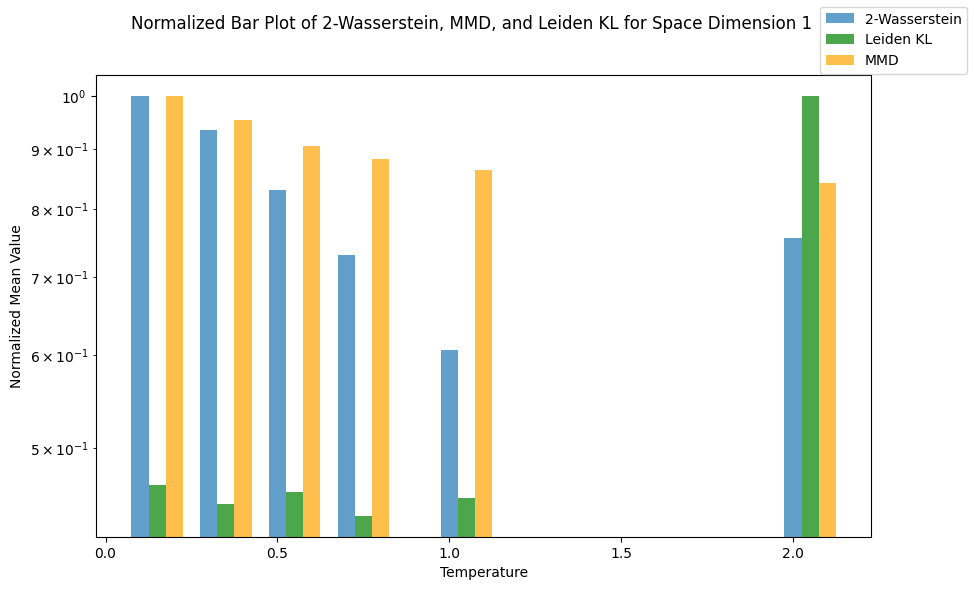

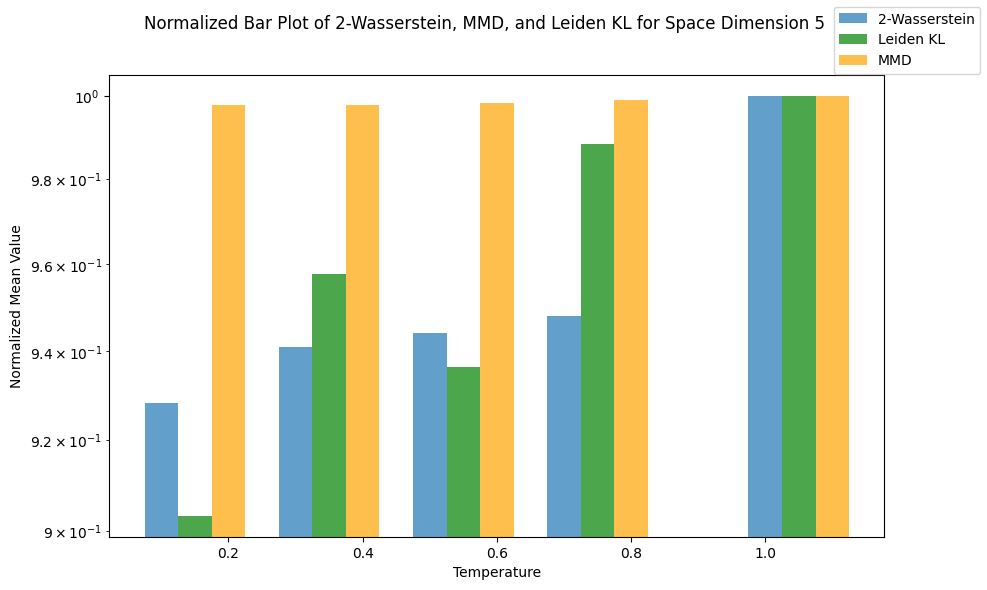

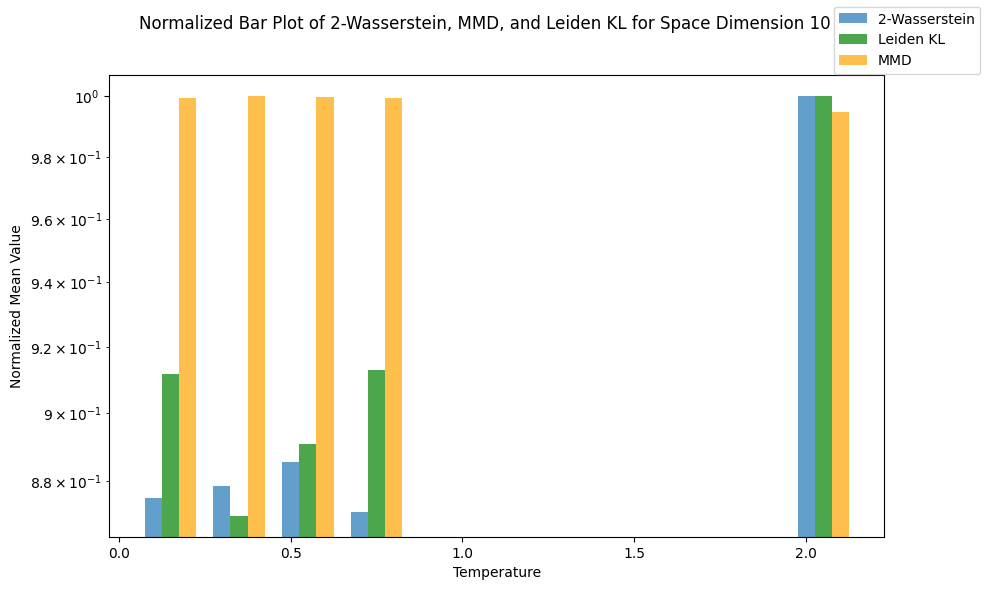

In [11]:
import matplotlib.pyplot as plt

def plot_bar_for_metric(space_dim=1, metric_name="2-Wasserstein"):
    # Filter the dataframe by the given space dimension and metric name
    filtered_df = combined_metrics_mean_std_overall[
        (combined_metrics_mean_std_overall['Space Dimension'] == space_dim) &
        (combined_metrics_mean_std_overall['Metric'] == metric_name)
    ]
    
    # Filter the dataframe for MMD metric
    filtered_df_mmd = combined_metrics_mean_std_overall[
        (combined_metrics_mean_std_overall['Space Dimension'] == space_dim) &
        (combined_metrics_mean_std_overall['Metric'] == "MMD")
    ]
    
    # Filter the dataframe for Leiden KL metric
    filtered_df_leiden_kl = combined_metrics_mean_std_overall[
        (combined_metrics_mean_std_overall['Space Dimension'] == space_dim) &
        (combined_metrics_mean_std_overall['Metric'] == "Leiden KL")
    ]
    
    if not filtered_df.empty and not filtered_df_mmd.empty and not filtered_df_leiden_kl.empty:
        fig, ax1 = plt.subplots(figsize=(10, 6))
        
        # Normalize the metrics so that the largest value is 1
        filtered_df['Mean'] /= filtered_df['Mean'].max()
        filtered_df_mmd['Mean'] /= filtered_df_mmd['Mean'].max()
        filtered_df_leiden_kl['Mean'] /= filtered_df_leiden_kl['Mean'].max()
        
        ax1.bar(filtered_df['Temperature'], filtered_df['Mean'], alpha=0.7, capsize=5, width=0.05, label=metric_name)
        ax1.bar(filtered_df_leiden_kl['Temperature'] + 0.05, filtered_df_leiden_kl['Mean'], alpha=0.7, capsize=5, width=0.05, color='green', label="Leiden KL")
        ax1.bar(filtered_df_mmd['Temperature'] + 0.1, filtered_df_mmd['Mean'], alpha=0.7, capsize=5, width=0.05, color='orange', label="MMD")
        
        ax1.set_xlabel('Temperature')
        ax1.set_ylabel('Normalized Mean Value')
        ax1.set_yscale('log')
        ax1.tick_params(axis='y')
        
        fig.suptitle(f'Normalized Bar Plot of {metric_name}, MMD, and Leiden KL for Space Dimension {space_dim}')
        fig.legend(loc='upper right')
        plt.show()
    else:
        print(f"No data available for Space Dimension {space_dim} and Metric {metric_name}, MMD, or Leiden KL.")

# Example usage for specific space dimensions:
for space_dim in [1, 5, 10]:
    plot_bar_for_metric(space_dim=space_dim, metric_name="2-Wasserstein")


Displaying UMAPs for Space Dimension 1 and Temperature 1.0
/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space1/temperature-1.0/run_2024-09-15_02-21-09/UMAPs


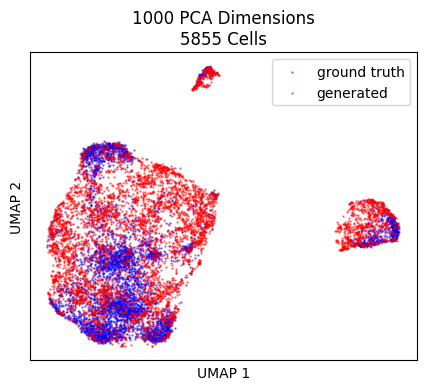

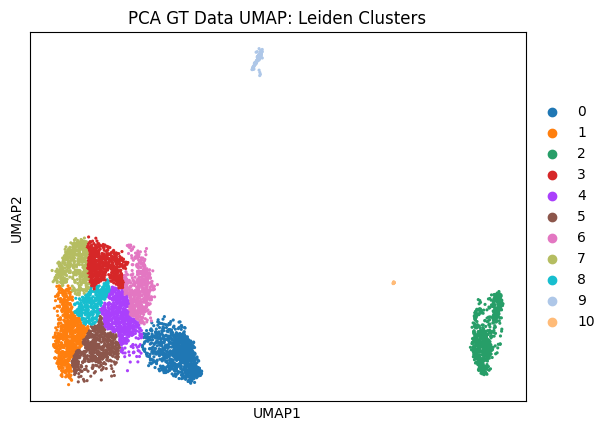

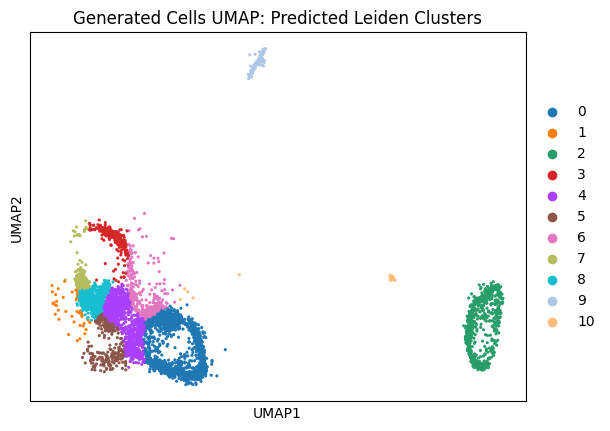

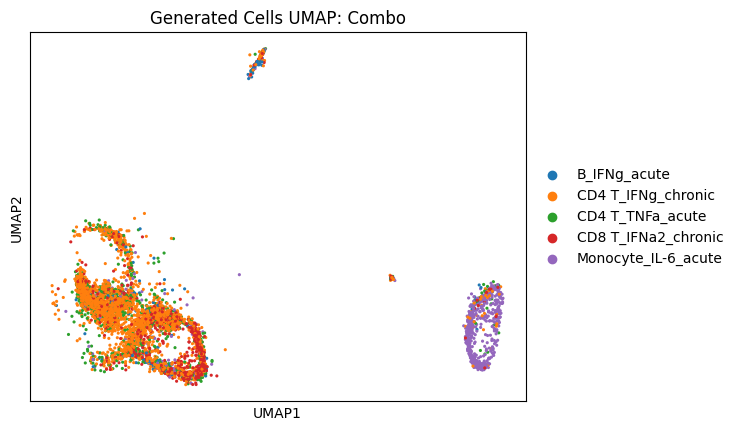

Displaying UMAPs for Space Dimension 5 and Temperature 0.1
/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space5/temperature-0.1/run_2024-09-15_02-31-35/UMAPs


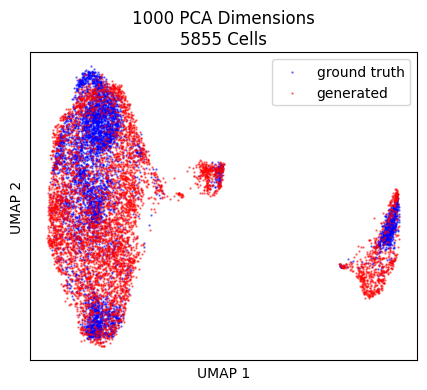

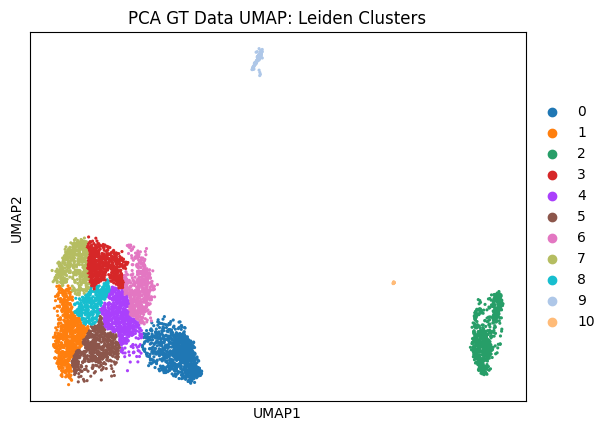

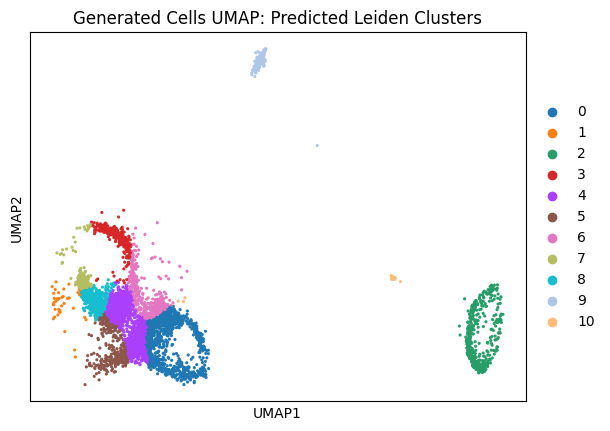

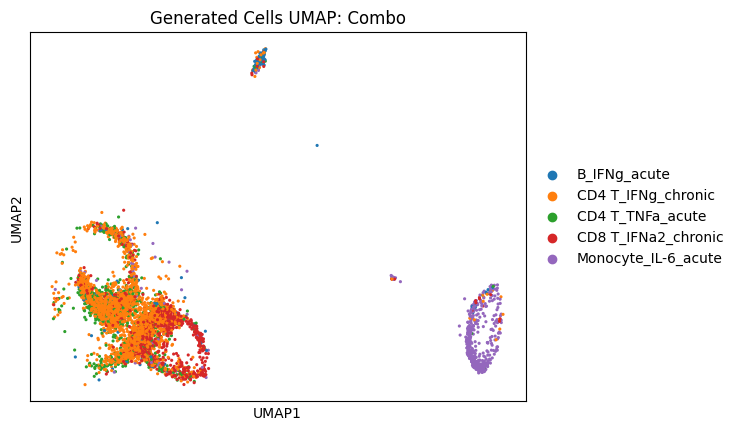

Displaying UMAPs for Space Dimension 10 and Temperature 0.3
/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/inference_results/ct_pert_split/pretrained-True_space10/temperature-0.3/run_2024-09-15_03-14-39/UMAPs


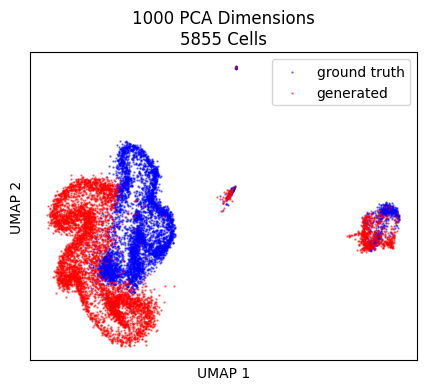

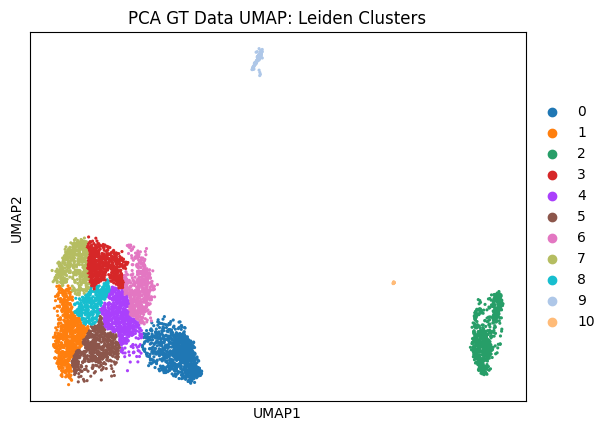

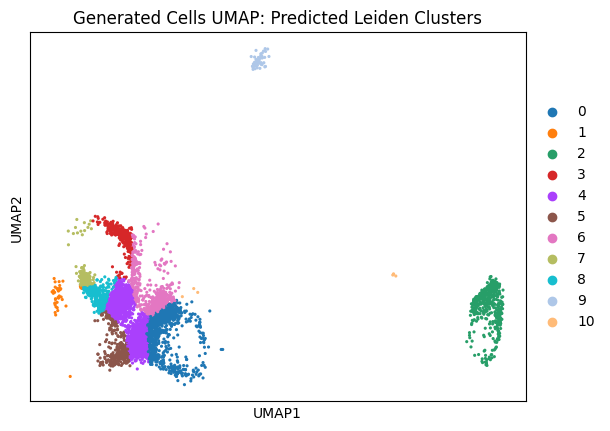

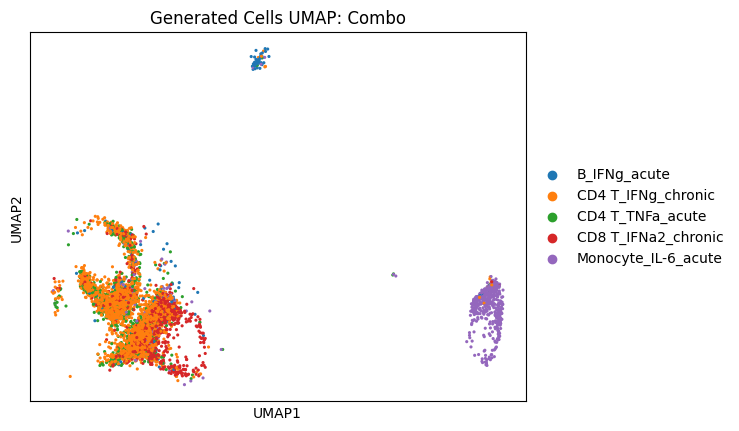

In [13]:
from IPython.display import Image, display
def display_umaps_for_conditions(space_dim, temperature, df):
    run_directory = df[(df['Space Dimension'] == space_dim) & (df['Temperature'] == temperature)]['Run Directory'].values[0]
    umap_directory = os.path.join(run_directory, "UMAPs")
    umap_files = [
        f"calmflow_pp4_space{space_dim}_total_umap.png",
        f"umappca_gt_data_Leiden.png",
        f"umapgen_data_Leiden_pred.png",
        f"umapgen_data_combined_labels.png"
    ]
    print(umap_directory)

    for umap_file in umap_files:
        umap_path = os.path.join(umap_directory, umap_file)
        if os.path.exists(umap_path):
            
            display(Image(filename=umap_path))
        else:
            print(f"UMAP file not found: {umap_path}")

# Example usage for specific space dimensions and temperatures:
space_temp_pairs = [{"space_dim": 1, "temperature": 1.0}, {"space_dim": 5, "temperature": 0.1}, {"space_dim": 10, "temperature": 0.3}]
for space_temp_pair in space_temp_pairs:
    space_dim = space_temp_pair["space_dim"]
    temperature = space_temp_pair["temperature"]
    print(f"Displaying UMAPs for Space Dimension {space_dim} and Temperature {temperature}")
    display_umaps_for_conditions(space_dim, temperature, combined_metrics_mean_std_overall)


In [ ]:
from IPython.display import Image, display

# Display UMAPs from the folder
umap_directory = os.path.join(run_directory, "UMAPs")
# List of UMAP image files
umap_files = [
    "calmflow_pp4_space1_total_umap.png",
    "umappca_gt_data_Leiden.png",
    "umapgen_data_Leiden_pred.png",
    "umapgen_data_combined_labels.png"
]

# Display UMAP images
for umap_file in umap_files:
    umap_path = os.path.join(umap_directory, umap_file)
    display(Image(filename=umap_path))




In [1]:
import os
import pickle
pert_split = "ct_pert"
# Load UMAP model that is trained on PCA GT data
umap_model_dir = "/gpfs/radev/scratch/dijk/sh2748/calmflow_singlecell/umap_models"
umap_model_path = os.path.join(umap_model_dir, f"{pert_split}_split_umap_model.pkl")
with open(umap_model_path, 'rb') as f:
    umap_model = pickle.load(f)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad

# Generate 1000D Gaussian noise
num_samples = 10000
num_features = 1000
gaussian_noise = np.random.normal(size=(num_samples, num_features))

# Transform using UMAP model
umap_transformed_noise = umap_model.transform(gaussian_noise)

# Create an AnnData object where the original noise is X and transformed noise is X_umap
adata = ad.AnnData(X=gaussian_noise)
adata.obsm["X_umap"] = umap_transformed_noise



In [11]:
leiden_classifier_path = "/home/sh2748/ifm/models/leiden_classifier.json"
pert_split = "ct_pert"
leiden_resol = 0.1
from utils.leiden_classifier import MLPClassifier
import torch
import json

with open(leiden_classifier_path, "r") as f:
        leiden_classifiers = json.load(f)
leiden_classifier_weights = leiden_classifiers[pert_split][str(leiden_resol)]["weights"]
num_leiden_classes =  leiden_classifiers[pert_split][str(leiden_resol)]["output_dim"]
# logger.info(f"Load Leiden classifier MLP from CHECKPOINT PATH: {leiden_classifier_weights}...")
leiden_classifier_model = MLPClassifier(output_dim=num_leiden_classes)
leiden_classifier_model.load_state_dict(torch.load(leiden_classifier_weights))
leiden_classifier_model = leiden_classifier_model.to('cuda')
leiden_classifier_model.eval()
# logger.info("Done.")

MLPClassifier(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=11, bias=True)
)

In [12]:
# Predict labels using leiden_classifier_model on the UMAP noise
umap_transformed_noise_tensor = torch.tensor(umap_transformed_noise, dtype=torch.float32).to('cuda')
with torch.no_grad():
    predicted_labels = leiden_classifier_model(umap_transformed_noise_tensor).argmax(dim=1).cpu().numpy()

adata.obs["leiden_pred"] = predicted_labels.astype(str)


/home/sh2748/.conda/envs/c2s2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sh2748/.conda/envs/c2s2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


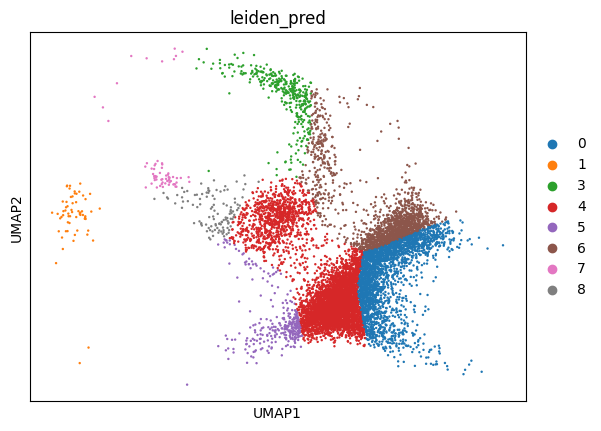

In [13]:
import scanpy as sc
sc.pl.umap(adata, color="leiden_pred")